In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# データ読み込み
data_path = 'C:/1作品/clothse_excel/train1800.xlsx'
data = pd.read_excel(data_path)

# 前処理
data_cleaned = data.drop(['Unnamed: 0', 'date', 'name'], axis=1)

# カテゴリ特徴量をエンコード
label_encoders = {}
for column in ['season']:
    le = LabelEncoder()
    data_cleaned[column] = le.fit_transform(data_cleaned[column])
    label_encoders[column] = le

# 説明変数と目的変数分け
X = data_cleaned.drop(['outer clothing', 'on', 'under'], axis=1)
y = data_cleaned[['outer clothing', 'on', 'under']]

# データセットを分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデル訓練
model_classifier = RandomForestClassifier(random_state=42)
model_classifier.fit(X_train, y_train)

# 予測
y_pred_class = model_classifier.predict(X_test)

#目的変数の精度
accuracies = [accuracy_score(y_test.iloc[:, i], y_pred_class[:, i]) for i in range(y_test.shape[1])]

accuracies_dict = {
    "outer clothing": accuracies[0],
    "on": accuracies[1],
    "under": accuracies[2]
}


print(accuracies_dict)


{'outer clothing': 0.55, 'on': 0.41388888888888886, 'under': 0.4111111111111111}


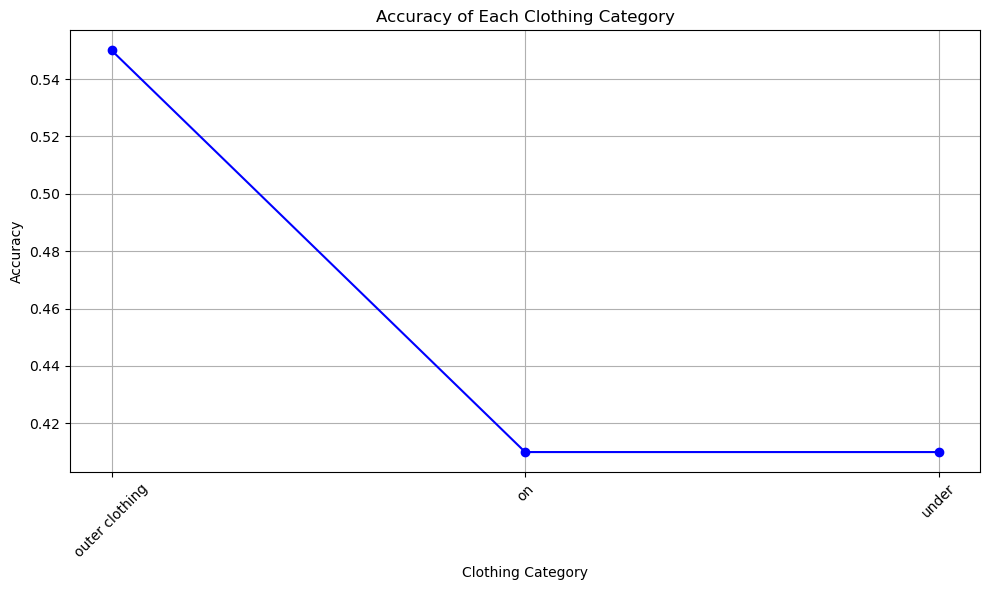

In [2]:
import matplotlib.pyplot as plt

# accuracies_dict from the provided code snippet
accuracies_dict = {
    "outer clothing": 0.55,  # Example accuracy for demonstration
    "on": 0.41,
    "under": 0.41
}

# Creating lists from the dictionary for plotting
categories = list(accuracies_dict.keys())
accuracies = list(accuracies_dict.values())

# Plotting the accuracies
plt.figure(figsize=(10, 6))
plt.plot(categories, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy of Each Clothing Category')
plt.xlabel('Clothing Category')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a file
plt.savefig('/mnt/data/model_accuracies_plot.png')
plt.show()


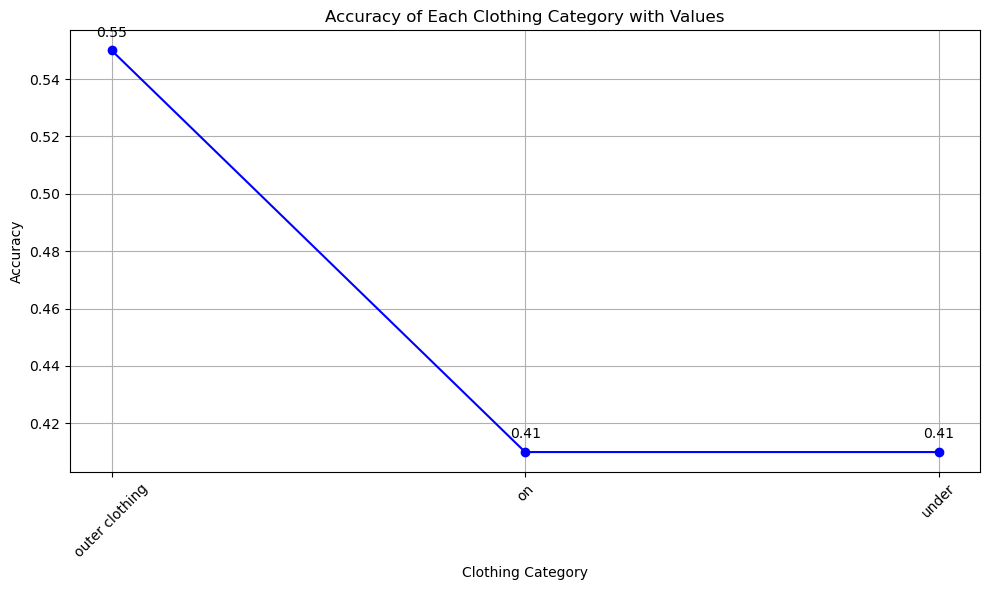

In [11]:
# Re-plotting the accuracies with annotated values

plt.figure(figsize=(10, 6))
plt.plot(categories, accuracies, marker='o', color='b')

# Annotating each point with its accuracy value
for i, txt in enumerate(accuracies):
    plt.annotate(f'{txt:.2f}', (categories[i], accuracies[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Accuracy of Each Clothing Category with Values')
plt.xlabel('Clothing Category')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot with annotations to a file
plt.savefig('/mnt/data/model_accuracies_plot_annotated.png')
plt.show()


In [4]:
X 

,max_tem,min_tem,mean_tem,average_humidity,average_wind_speed(m/s),sensible_temperature,season
0,6.8,3.9,5.35,31,2.3,0.733549,3
1,6.8,3.9,5.35,31,2.3,0.733549,3
2,6.8,3.9,5.35,31,2.3,0.733549,3
3,6.8,3.9,5.35,31,2.3,0.733549,3
4,6.8,3.9,5.35,31,2.3,0.733549,3
...,...,...,...,...,...,...,...
1794,23.3,10.3,16.80,63,2.6,17.543294,1
1795,23.3,10.3,16.80,63,2.6,17.543294,1
1796,23.3,10.3,16.80,63,2.6,17.543294,1
1797,23.3,10.3,16.80,63,2.6,17.543294,1


In [5]:
# import joblib

# # 保存标签编码器
# joblib.dump(label_encoders['season'], 'C:/1作品/picture_myclothes/season_encoder.joblib')


In [6]:
# from sklearn.metrics import classification_report, confusion_matrix
# import numpy as np
# import pandas as pd

# # 定义Excel文件路径
# excel_filename = "C:/1作品/clothse_excel/classification_report1.xlsx"

# # 类别名称列表定义
# category_names = {
#     'outer clothing': ['Hoodie', 'Unknown', 'coat', 'denim jacket', 'jackets', 'knitted coat', 'long down jacket', 'shirts', 'short down jacket', 'short trench coat', 'short woolen coat', 'shorts', 'suit jackets', 'sweater', 't-shirts', 'windbreaker'],
#     'on': ['Hoodie', 'Unknown', 'base layer', 'denim jacket', 'long-sleeved dress', 'shirts', 'suit jackets', 'sweater', 't-shirts', 'turtleneck sweater', 'vest'],
#     'under': ['dress', 'jeans', 'knitted pants', 'leather pants', 'long skirt', 'long-sleeved dress', 'pants', 'short pants', 'short skirt', 'sportswear', 'suit pants', 'woolen pants']
# }

# # 初始化Excel写入器
# with pd.ExcelWriter(excel_filename) as writer:
#     for i, target in enumerate(['outer clothing', 'on', 'under']):
#         # 生成分类报告和混淆矩阵（这里使用示例数据，你需要替换为实际的y_test和y_pred_class）
#         # report = classification_report(y_test.iloc[:, i], y_pred_class[:, i], zero_division=0)
#         cm = confusion_matrix(y_test.iloc[:, i], y_pred_class[:, i])
        
#         # 创建DataFrame
#         cm_df = pd.DataFrame(cm, index=category_names[target], columns=category_names[target])
        
#         # 将DataFrame保存到Excel的不同工作表
#         cm_df.to_excel(writer, sheet_name=target)

# # 注意：无需显式调用writer.save()，因为with语句块结束时会自动保存和关闭文件


In [7]:
# from sklearn.metrics import classification_report, confusion_matrix
# import numpy as np
# import pandas as pd

# # 定义Excel文件路径
# excel_filename = "C:/1作品/clothse_excel/classification_report_and_confusion_matrix.xlsx"

# # 类别名称列表定义
# category_names = {
#     'outer clothing': ['Hoodie', 'Unknown', 'coat', 'denim jacket', 'jackets', 'knitted coat', 'long down jacket', 'shirts', 'short down jacket', 'short trench coat', 'short woolen coat', 'shorts', 'suit jackets', 'sweater', 't-shirts', 'windbreaker'],
#     'on': ['Hoodie', 'Unknown', 'base layer', 'denim jacket', 'long-sleeved dress', 'shirts', 'suit jackets', 'sweater', 't-shirts', 'turtleneck sweater', 'vest'],
#     'under': ['dress', 'jeans', 'knitted pants', 'leather pants', 'long skirt', 'long-sleeved dress', 'pants', 'short pants', 'short skirt', 'sportswear', 'suit pants', 'woolen pants']
# }

# # 初始化Excel写入器
# with pd.ExcelWriter(excel_filename) as writer:
#     for i, target in enumerate(['outer clothing', 'on', 'under']):
#         # 生成分类报告（这里使用示例数据，你需要替换为实际的y_test和y_pred_class）
#         report = classification_report(y_test.iloc[:, i], y_pred_class[:, i], target_names=category_names[target], zero_division=0)
        
#         # 将分类报告转换为DataFrame
#         report_df = pd.DataFrame([x.split() for x in report.split('\n')])

#         # 保存分类报告到Excel的不同工作表
#         report_sheet_name = f"{target}_report"
#         report_df.to_excel(writer, sheet_name=report_sheet_name, index=False, header=False)

#         # 生成混淆矩阵
#         cm = confusion_matrix(y_test.iloc[:, i], y_pred_class[:, i])
        
#         # 创建混淆矩阵的DataFrame
#         cm_df = pd.DataFrame(cm, index=category_names[target], columns=category_names[target])
        
#         # 保存混淆矩阵到Excel的不同工作表
#         cm_sheet_name = f"{target}_confusion_matrix"
#         cm_df.to_excel(writer, sheet_name=cm_sheet_name)

# # 注意：无需显式调用writer.save()，因为with语句块结束时会自动保存和关闭文件


In [8]:

# from sklearn.metrics import classification_report, confusion_matrix
# import numpy as np


# report_filename = "C:/1作品/clothse_excel/classification_report.txt"


# with open(report_filename, "w") as file:
#     file.write("例:\n")
#     np.savetxt(file, y_pred_class[:5], fmt='%s', header=' '.join(['outer clothing', 'on', 'under']))

#     # 各目的変数の評価指標を計算
#     for i, target in enumerate(['outer clothing', 'on', 'under']):
#         file.write(f"\n{target} の評価:\n")
#         report = classification_report(y_test.iloc[:, i], y_pred_class[:, i], zero_division=0)
#         file.write(report)
#         file.write("\n混同行列:\n")
#         cm = confusion_matrix(y_test.iloc[:, i], y_pred_class[:, i])
#         cm_str = '\n'.join(['\t'.join([str(cell) for cell in row]) for row in cm])
#         file.write(cm_str + "\n")


# report_filename


In [9]:
# from sklearn.metrics import classification_report, confusion_matrix
# import numpy as np
# import pandas as pd

# report_filename = "C:/1作品/clothse_excel/classification_report1.txt"

# # 假设类别名称列表已经定义好，例如：
# category_names = {
#     'outer clothing': ['Hoodie', 'Unknown', 'coat', 'denim jacket', 'jackets', 'knitted coat', 'long down jacket', 'shirts', 'short down jacket', 'short trench coat', 'short woolen coat', 'shorts', 'suit jackets', 'sweater', 't-shirts', 'windbreaker'],
#     'on': ['Hoodie', 'Unknown', 'base layer', 'denim jacket', 'long-sleeved dress', 'shirts', 'suit jackets', 'sweater', 't-shirts', 'turtleneck sweater', 'vest'],
#     'under': ['dress', 'jeans', 'knitted pants', 'leather pants', 'long skirt', 'long-sleeved dress', 'pants', 'short pants', 'short skirt', 'sportswear', 'suit pants', 'woolen pants']
# }

# with open(report_filename, "w") as file:
#     file.write("例:\n")
#     # 此处假设y_pred_class[:5]已正确生成并包含预期格式的数据
#     np.savetxt(file, y_pred_class[:5], fmt='%s', header=' '.join(['outer clothing', 'on', 'under']))

#     for i, target in enumerate(['outer clothing', 'on', 'under']):
#         file.write(f"\n{target} の評価:\n")
#         report = classification_report(y_test.iloc[:, i], y_pred_class[:, i], zero_division=0)
#         file.write(report)
        
#         file.write("\n混同行列:\n")
#         cm = confusion_matrix(y_test.iloc[:, i], y_pred_class[:, i])
#         # 创建DataFrame，增加行列的可读性
#         cm_df = pd.DataFrame(cm, index=category_names[target], columns=category_names[target])
#         # 将DataFrame转换为字符串并写入文件
#         cm_str = cm_df.to_string()
#         file.write(cm_str + "\n")


In [10]:
# from sklearn.ensemble import RandomForestClassifier
# from joblib import dump

# # 假设您已经完成了数据预处理并分割了数据集

# # 定义模型
# model_classifier = RandomForestClassifier(random_state=42)

# # 训练模型
# model_classifier.fit(X_train, y_train)

# # 指定模型保存路径
# model_path = 'C:/1作品/clothse_excel/random_forest_classifier.joblib'

# # 保存模型
# dump(model_classifier, model_path)

# print(f"模型已保存至 {model_path}")
